# BANA Capstone Project: Multinomial NLP Classification Model

### Loading Libraries

In [1]:
# Set-up
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## First look at Data

In [2]:
#Reading data
Snap = pd.read_excel(r"C:\Users\tanya\Desktop\Capstone\2019-20 Snapshot.xlsx", sheet_name = "19-20 Snapshot")
key = pd.read_excel(r"C:\Users\tanya\Desktop\Capstone\2019-20 Snapshot.xlsx", sheet_name = "Job IDs")

#Trimming data
Snap = Snap[['Job Titles','3-Digit Job Group Code']]
Snap.columns = ["title","code"]

key = key[['Job Text','Job Group Code']]
key.columns = ["title","code"]

In [3]:
#Viewing 10 random rows of training data
Snap.sample(10)

,title,code
6765,Physician Assistant - COM,300
5621,Instructor - Adj,206
3480,Computer User Support Specialist I,300
4164,Equipment Operator 1-U,700
342,Assoc General Counsel,102
7842,Program Coordinator,300
8375,Researcher - Adj,206
5256,Instructor - Adj,206
3870,Dir Information Technology,102
8621,Sr Clinical Research Professional - COM,300


In [4]:
#Viewing 10 random rows of test data
key.sample(10)

,title,code
737,Research Compliance Specialist,300
1078,Dir Marketing Publication & Facil,102
302,Lieutenant,104
793,Sr Med Photographer,300
1056,Computer Lab Technician,500
962,Laborer-U,700
785,Sr Industrial Hygienist,300
476,Professor - Adj (FD),206
620,Financial Administrator 1 (NE),300
831,Univ Serv Assoc 1,300


In [5]:
#Converting code column to categorical datatype, and title to string datatype
Snap.code = Snap.code.astype('category')
Snap.title = Snap.title.astype('str')
Snap = pd.DataFrame(Snap)
print(Snap.dtypes)

key.code = key.code.astype('category')
key.title = key.title.astype('str')
key = pd.DataFrame(key)
print(key.dtypes)

title      object
code     category
dtype: object
title      object
code     category
dtype: object


## Visual EDA

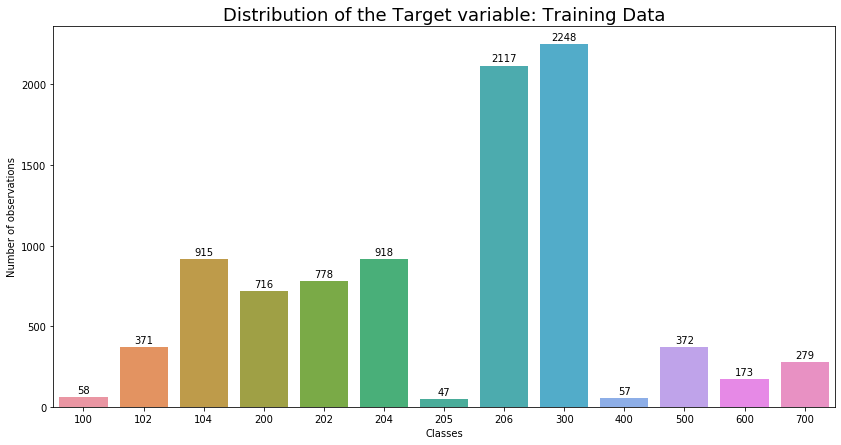

In [6]:
import seaborn as sns

plt.figure(figsize=(14,7))

plot = sns.countplot(Snap.code)
for p in plot.patches:
    height = p.get_height()
    width = p.get_x()+ p.get_width()/2
    plot.annotate(height, (width,height), xytext = (0, 4), textcoords = "offset points", ha = 'center', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Number of observations')
plt.title('Distribution of the Target variable: Training Data', fontsize = 18);

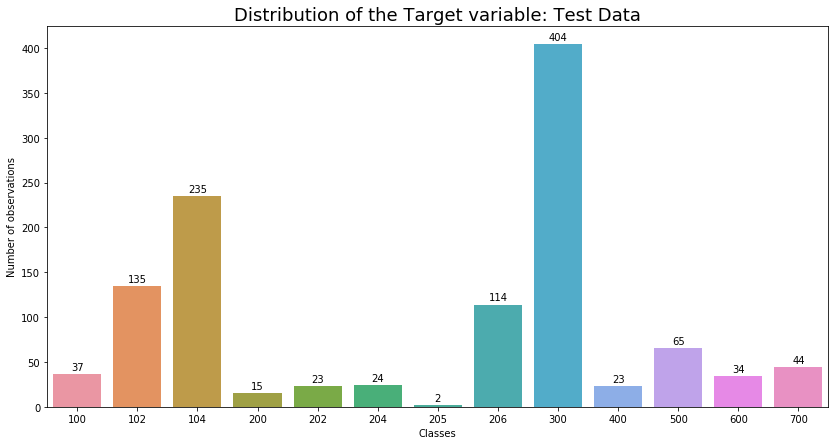

In [7]:
plt.figure(figsize=(14,7))

plot = sns.countplot(key.code)
for p in plot.patches:
    height = p.get_height()
    width = p.get_x()+ p.get_width()/2
    plot.annotate(height, (width,height), xytext = (0, 4), textcoords = "offset points", ha = 'center', fontsize=10)

plt.xlabel('Classes')
plt.ylabel('Number of observations')
plt.title('Distribution of the Target variable: Test Data', fontsize = 18);

## Data Pre-processing

In [8]:
#Importing libraries
import nltk
from nltk.corpus import stopwords
from spacy.lang.en import English

#Function for data Pre-processing
def clean_text(title):
    tokens = [word for word in nltk.regexp_tokenize(title.lower(),'\w+') 
                
              if word not in stopwords.words('english') 
                    and word not in string.punctuation
                    and word.isalpha()]
    tokens = " ".join([i for i in tokens])
    return tokens

#Applying pre-processing function to title column
Snap['title_clean'] = Snap.title.apply(clean_text)
key['title_clean'] = key.title.apply(clean_text)

Snap.sample(10)

,title,code,title_clean
1658,Asst Professor - Adj,206,asst professor adj
8947,Univ Law Enf Off 3,300,univ law enf
1694,Asst Professor - Adj,206,asst professor adj
6051,Instructor - Clin Geo - Otolaryngology-Head an...,205,instructor clin geo otolaryngology head neck s...
8998,Post Doc Fellow,500,post doc fellow
6767,Physician Assistant - COM,300,physician assistant com
8823,Staff Attorney,300,staff attorney
3697,Database Administrator III - ERP,300,database administrator iii erp
5659,Instructor - Adj,206,instructor adj
1959,Asst Professor - Adj COM,206,asst professor adj com


## Assigning Train and Test Data

In [9]:
#Assigning test and train data
X_train = Snap.title_clean
X_test = key.title_clean
y_train = Snap.code
y_test = key.code

## Vectorization

In [10]:
#Loading libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Vectorization 1 : Count vectorizer
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#Vectorization 2 : Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Data Modeling

In [11]:
#Non-Paramteric Model
from sklearn.neighbors import KNeighborsClassifier

#Linear Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression

#Non-Linear Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Model Assessment, Hyperparameter Tuning
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

### K-Nearest Neighbor Classifier

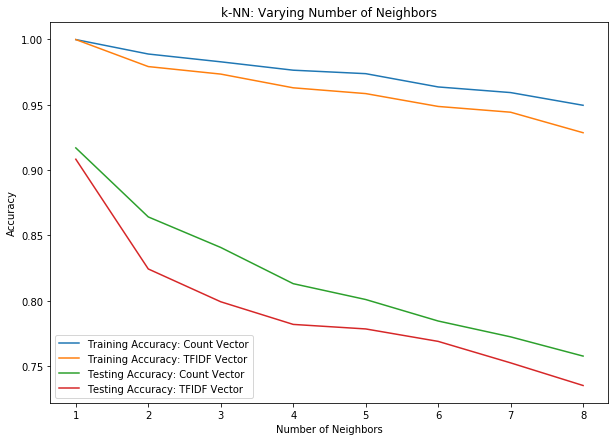

In [12]:
neighbors = np.arange(1, 9)
train_accuracy1 = np.empty(len(neighbors))
test_accuracy1 = np.empty(len(neighbors))
train_accuracy2 = np.empty(len(neighbors))
test_accuracy2 = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup 2 k-NN Classifiers with k neighbors each
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn2 = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn1.fit(count_train, y_train)
    knn2.fit(tfidf_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy1[i] = knn1.score(count_train, y_train)
    train_accuracy2[i] = knn2.score(tfidf_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy1[i] = knn1.score(count_test, y_test)
    test_accuracy2[i] = knn2.score(tfidf_test, y_test)

# Generate plot
plt.figure(figsize=(10,7))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy1, label = 'Training Accuracy: Count Vector')
plt.plot(neighbors, train_accuracy2, label = 'Training Accuracy: TFIDF Vector')
plt.plot(neighbors, test_accuracy1, label = 'Testing Accuracy: Count Vector')
plt.plot(neighbors, test_accuracy2, label = 'Testing Accuracy: TFIDF Vector')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### KNN: Count Vectorizer

In [13]:
#Data training : K_Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
knn_classifier.fit(count_train, y_train)

#Predictions
train_pred = knn_classifier.predict(count_train)
test_pred = knn_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred))

Training Accuracy: 0.9997789811028843
Testing Accuracy: 0.9168831168831169
              precision    recall  f1-score   support

         100       0.94      0.81      0.87        37
         102       0.92      0.95      0.93       135
         104       0.95      0.96      0.96       235
         200       0.62      0.53      0.57        15
         202       0.70      0.61      0.65        23
         204       0.71      0.83      0.77        24
         205       0.40      1.00      0.57         2
         206       0.87      0.82      0.84       114
         300       0.96      0.96      0.96       404
         400       0.78      0.91      0.84        23
         500       0.85      0.95      0.90        65
         600       0.94      0.91      0.93        34
         700       0.97      0.86      0.92        44

    accuracy                           0.92      1155
   macro avg       0.82      0.85      0.82      1155
weighted avg       0.92      0.92      0.92      1155



### KNN: TF IDF Vectorizer

In [14]:
#Data training : K_Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
knn_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = knn_classifier.predict(tfidf_train)
test_pred = knn_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred))

Training Accuracy: 0.9997789811028843
Testing Accuracy: 0.9082251082251083
              precision    recall  f1-score   support

         100       0.94      0.84      0.89        37
         102       0.93      0.94      0.94       135
         104       0.94      0.95      0.94       235
         200       0.71      0.33      0.45        15
         202       0.79      0.48      0.59        23
         204       0.90      0.38      0.53        24
         205       0.12      0.50      0.20         2
         206       0.76      0.84      0.80       114
         300       0.94      0.97      0.95       404
         400       0.79      1.00      0.88        23
         500       0.94      0.95      0.95        65
         600       0.94      0.94      0.94        34
         700       1.00      0.89      0.94        44

    accuracy                           0.91      1155
   macro avg       0.82      0.77      0.77      1155
weighted avg       0.91      0.91      0.91      1155



### Multinomial Naive Bayes: Count Vector

In [15]:
#Data training : Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

#Predictions
train_pred = nb_classifier.predict(count_train)
test_pred = nb_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred))

Training Accuracy: 0.9254061222234501
Testing Accuracy: 0.8103896103896104
              precision    recall  f1-score   support

         100       1.00      0.22      0.36        37
         102       0.66      0.79      0.72       135
         104       0.81      0.83      0.82       235
         200       0.75      0.20      0.32        15
         202       0.61      0.83      0.70        23
         204       0.45      0.88      0.59        24
         205       0.50      0.50      0.50         2
         206       0.88      0.79      0.83       114
         300       0.92      0.89      0.91       404
         400       0.74      0.61      0.67        23
         500       0.77      0.83      0.80        65
         600       0.78      0.85      0.82        34
         700       0.81      0.80      0.80        44

    accuracy                           0.81      1155
   macro avg       0.75      0.69      0.68      1155
weighted avg       0.83      0.81      0.81      1155



### Multinomial Naive Bayes: TF-IDF Vector

In [16]:
#Data training
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = nb_classifier.predict(tfidf_train)
test_pred = nb_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred))

Training Accuracy: 0.8979997789811028
Testing Accuracy: 0.7887445887445887
              precision    recall  f1-score   support

         100       1.00      0.03      0.05        37
         102       0.64      0.61      0.62       135
         104       0.77      0.88      0.82       235
         200       0.40      0.13      0.20        15
         202       0.68      0.74      0.71        23
         204       0.47      0.62      0.54        24
         205       0.00      0.00      0.00         2
         206       0.81      0.86      0.83       114
         300       0.86      0.94      0.90       404
         400       0.00      0.00      0.00        23
         500       0.78      0.75      0.77        65
         600       0.88      0.82      0.85        34
         700       0.85      0.75      0.80        44

    accuracy                           0.79      1155
   macro avg       0.63      0.55      0.54      1155
weighted avg       0.78      0.79      0.76      1155



### Multinomial Logistic Regression: Count Vector

In [17]:
#Data training : Multinomial Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(count_train, y_train)

#Predictions
train_pred = lr_classifier.predict(count_train)
test_pred = lr_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9856337716874792
Testing Accuracy: 0.8597402597402597
              precision    recall  f1-score   support

         100       0.94      0.43      0.59        37
         102       0.82      0.84      0.83       135
         104       0.91      0.92      0.91       235
         200       0.56      0.93      0.70        15
         202       0.61      0.87      0.71        23
         204       0.67      0.83      0.74        24
         205       0.00      0.00      0.00         2
         206       0.93      0.73      0.82       114
         300       0.87      0.96      0.91       404
         400       0.92      0.52      0.67        23
         500       0.88      0.77      0.82        65
         600       0.89      0.74      0.81        34
         700       0.89      0.77      0.83        44

    accuracy                           0.86      1155
   macro avg       0.76      0.72      0.72      1155
weighted avg       0.87      0.86      0.86      1155



### Multinomial Logistic Regression: TF-IDF Vector

In [18]:
#Data training : Multinomial Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = lr_classifier.predict(tfidf_train)
test_pred = lr_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9741407890374627
Testing Accuracy: 0.8251082251082251
              precision    recall  f1-score   support

         100       0.91      0.27      0.42        37
         102       0.81      0.73      0.77       135
         104       0.87      0.90      0.88       235
         200       0.61      0.93      0.74        15
         202       0.56      0.87      0.68        23
         204       0.66      0.88      0.75        24
         205       0.00      0.00      0.00         2
         206       0.93      0.75      0.83       114
         300       0.81      0.96      0.88       404
         400       0.91      0.43      0.59        23
         500       0.88      0.66      0.75        65
         600       0.88      0.68      0.77        34
         700       0.93      0.61      0.74        44

    accuracy                           0.83      1155
   macro avg       0.75      0.67      0.68      1155
weighted avg       0.84      0.83      0.82      1155



### SVM Classifier: Count Vector

In [19]:
# Hyper-Parameter fine-tuning using Cross-Validation
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

# Declare the model
svm_clf = SGDClassifier(max_iter=1000)

# Cross-Validation
svm_clf = GridSearchCV(svm_clf, param_grid=params)

# Fit the model
svm_clf.fit(count_train, y_train)

# Predictions
test_pred = svm_clf.predict(count_test)

# Exploration
### Hyperparameters of selected model
print("Hyperparameters of the tuned model: {}".format(svm_clf.best_params_))

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(svm_clf.best_score_))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(svm_clf.score(count_test, y_test)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Hyperparameters of the tuned model: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Training Accuracy: 0.8693778318046192
Testing Accuracy: 0.9064935064935065
              precision    recall  f1-score   support

         100       1.00      0.65      0.79        37
         102       0.86      0.92      0.89       135
         104       0.94      0.92      0.93       235
         200       0.61      0.93      0.74        15
         202       0.69      0.87      0.77        23
         204       0.69      0.83      0.75        24
         205       0.00      0.00      0.00         2
         206       0.94      0.76      0.84       114
         300       0.94      0.97      0.95       404
         400       0.80      0.87      0.83        23
         500       0.93      0.95      0.94        65
         600       0.94      0.91      0.93        34
         700       0.97      0.84      0.90        44

    accuracy                           0.91      1155
   macro avg       0.79  

### SVM Classifier: TF-IDF Vector

In [20]:
# Hyper-Parameter fine-tuning using Cross-Validation
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

# Declare the model
svm_clf = SGDClassifier(max_iter=1000)

# Cross-Validation
svm_clf = GridSearchCV(svm_clf, param_grid=params)

# Fit the model
svm_clf.fit(tfidf_train, y_train)

# Predictions
test_pred = svm_clf.predict(tfidf_test)

# Exploration
### Hyperparameters of selected model
print("Hyperparameters of the tuned model: {}".format(svm_clf.best_params_))

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(svm_clf.best_score_))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(svm_clf.score(tfidf_test, y_test)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Hyperparameters of the tuned model: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
Training Accuracy: 0.8648469444137473
Testing Accuracy: 0.8588744588744589
              precision    recall  f1-score   support

         100       0.84      0.57      0.68        37
         102       0.79      0.85      0.82       135
         104       0.90      0.86      0.88       235
         200       0.61      0.93      0.74        15
         202       0.57      0.87      0.69        23
         204       0.60      0.88      0.71        24
         205       0.00      0.00      0.00         2
         206       0.94      0.77      0.85       114
         300       0.91      0.95      0.93       404
         400       0.81      0.57      0.67        23
         500       0.81      0.78      0.80        65
         600       0.90      0.82      0.86        34
         700       0.85      0.77      0.81        44

    accuracy                           0.86      1155
   macro avg       0.73  

### Decision Tree Classifier: Count Vector

In [43]:
#Data training : Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(count_train, y_train)

#Predictions
train_pred = tree_classifier.predict(count_train)
test_pred = tree_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9997789811028843
Testing Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

         100       1.00      0.84      0.91        37
         102       0.94      0.98      0.96       135
         104       0.97      0.97      0.97       235
         200       0.58      0.93      0.72        15
         202       0.69      0.87      0.77        23
         204       0.67      0.83      0.74        24
         205       0.00      0.00      0.00         2
         206       0.93      0.75      0.83       114
         300       0.96      0.98      0.97       404
         400       0.91      0.91      0.91        23
         500       0.95      0.97      0.96        65
         600       0.94      0.91      0.93        34
         700       0.95      0.84      0.89        44

    accuracy                           0.93      1155
   macro avg       0.81      0.83      0.81      1155
weighted avg       0.94      0.93      0.93      1155



### Decision Tree Classifier: TF-IDF Vector

In [22]:
#Data training : Decision Tree
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = tree_classifier.predict(tfidf_train)
test_pred = tree_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9997789811028843
Testing Accuracy: 0.922943722943723
              precision    recall  f1-score   support

         100       1.00      0.86      0.93        37
         102       0.93      0.97      0.95       135
         104       0.95      0.96      0.96       235
         200       0.56      0.93      0.70        15
         202       0.68      0.74      0.71        23
         204       0.67      0.83      0.74        24
         205       0.25      0.50      0.33         2
         206       0.94      0.71      0.81       114
         300       0.95      0.97      0.96       404
         400       0.81      0.96      0.88        23
         500       0.95      0.95      0.95        65
         600       0.94      0.91      0.93        34
         700       0.95      0.84      0.89        44

    accuracy                           0.92      1155
   macro avg       0.81      0.86      0.83      1155
weighted avg       0.93      0.92      0.92      1155



### Random Forest Classifier: Count Vector

In [23]:
#Data training : Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(count_train, y_train)

#Predictions
train_pred = rf_classifier.predict(count_train)
test_pred = rf_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9986738866173058
Testing Accuracy: 0.9212121212121213
              precision    recall  f1-score   support

         100       1.00      0.89      0.94        37
         102       0.90      0.97      0.93       135
         104       0.96      0.94      0.95       235
         200       0.60      0.80      0.69        15
         202       0.70      0.83      0.76        23
         204       0.65      0.83      0.73        24
         205       0.67      1.00      0.80         2
         206       0.95      0.75      0.84       114
         300       0.94      0.98      0.96       404
         400       0.91      0.87      0.89        23
         500       0.95      0.94      0.95        65
         600       0.94      0.85      0.89        34
         700       0.95      0.82      0.88        44

    accuracy                           0.92      1155
   macro avg       0.85      0.88      0.86      1155
weighted avg       0.93      0.92      0.92      1155



### Random Forest Classifier: TF-IDF Vector

In [24]:
#Data training : Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = rf_classifier.predict(tfidf_train)
test_pred = rf_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9986738866173058
Testing Accuracy: 0.9160173160173161
              precision    recall  f1-score   support

         100       0.94      0.84      0.89        37
         102       0.91      0.98      0.94       135
         104       0.96      0.93      0.94       235
         200       0.61      0.93      0.74        15
         202       0.65      0.65      0.65        23
         204       0.69      0.75      0.72        24
         205       0.25      0.50      0.33         2
         206       0.91      0.75      0.82       114
         300       0.94      0.98      0.96       404
         400       0.95      0.91      0.93        23
         500       0.94      0.94      0.94        65
         600       0.94      0.85      0.89        34
         700       0.95      0.82      0.88        44

    accuracy                           0.92      1155
   macro avg       0.82      0.83      0.82      1155
weighted avg       0.92      0.92      0.92      1155



### Gradient Boosting Classifier: Count Vector

In [25]:
#Data training : Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(count_train, y_train)

#Predictions
train_pred = gb_classifier.predict(count_train)
test_pred = gb_classifier.predict(count_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9950270748148967
Testing Accuracy: 0.9021645021645022
              precision    recall  f1-score   support

         100       0.97      0.78      0.87        37
         102       0.84      0.93      0.88       135
         104       0.95      0.88      0.91       235
         200       0.61      0.93      0.74        15
         202       0.71      0.87      0.78        23
         204       0.68      0.88      0.76        24
         205       0.00      0.00      0.00         2
         206       0.93      0.75      0.83       114
         300       0.93      0.97      0.95       404
         400       0.85      0.96      0.90        23
         500       0.91      0.92      0.92        65
         600       0.91      0.91      0.91        34
         700       0.95      0.82      0.88        44

    accuracy                           0.90      1155
   macro avg       0.79      0.81      0.79      1155
weighted avg       0.91      0.90      0.90      1155



### Gradient Boosting Classifier: TF-IDF Vector

In [26]:
#Data training : Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(tfidf_train, y_train)

#Predictions
train_pred = gb_classifier.predict(tfidf_train)
test_pred = gb_classifier.predict(tfidf_test)

#Evaluation
###In-sample accuracy score
print("Training Accuracy: {}".format(metrics.accuracy_score(y_train,train_pred)))
###Out-sample accuracy score
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test,test_pred)))

###Complete classification report
print(metrics.classification_report(y_test,test_pred)) 

Training Accuracy: 0.9991159244115372
Testing Accuracy: 0.9142857142857143
              precision    recall  f1-score   support

         100       0.94      0.86      0.90        37
         102       0.93      0.96      0.95       135
         104       0.96      0.92      0.94       235
         200       0.62      0.87      0.72        15
         202       0.73      0.83      0.78        23
         204       0.68      0.79      0.73        24
         205       0.11      0.50      0.18         2
         206       0.94      0.71      0.81       114
         300       0.93      0.98      0.95       404
         400       0.85      1.00      0.92        23
         500       0.95      0.92      0.94        65
         600       0.91      0.91      0.91        34
         700       0.95      0.82      0.88        44

    accuracy                           0.91      1155
   macro avg       0.81      0.85      0.82      1155
weighted avg       0.92      0.91      0.92      1155

